# **[Outlier Detection and Removal : z-score and standard deviation](https://github.com/codebasics/py/tree/master/ML/FeatureEngineering/2_outliers_z_score)**

In [1]:
import pandas as pd
import matplotlib

from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df= pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df= df.drop(['Weight'], axis=1)

In [5]:
df.sample(10)

,Gender,Height
8854,Female,65.780625
4053,Male,63.931804
8589,Female,63.866815
8901,Female,66.236871
7354,Female,65.215231
6789,Female,63.773186
2486,Male,71.536056
6033,Female,64.528998
7680,Female,64.908510
764,Male,68.626886


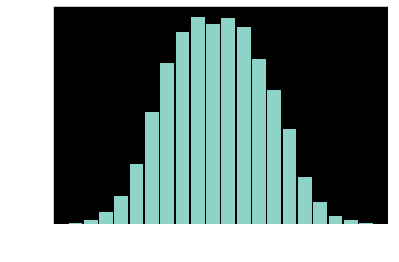

In [6]:
plt.hist(df.Height, bins=20, rwidth=.9)
plt.xlabel('Heights(inches)')
plt.ylabel('Count')
plt.show()

In [8]:
df.Height.min()

54.2631333250971

In [9]:
df.Height.max()


78.9987423463896

In [10]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

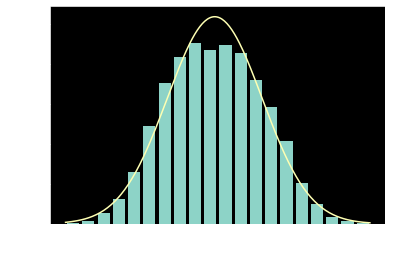

In [7]:
from scipy.stats import norm
import numpy as np

plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Heights (inches)')
plt.ylabel('Count')

rng= np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))


In [18]:
df_mean= df.Height.mean()
df_mean

66.36755975482124

In [19]:
df_std_dev= df.Height.std()
df_std_dev

3.8475281207732293

In [17]:
upper_limit= df_mean+ 3*df_std_dev
upper_limit

77.91014411714093

In [20]:
lower_limit = df_mean - 3*df_std_dev
lower_limit


54.82497539250156

In [23]:
outliers= df[(df.Height>upper_limit) | (df.Height<lower_limit)]
outliers

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [24]:
df_outliers_removed = df[(df.Height < upper_limit) & (df.Height > lower_limit)]
df_outliers_removed.shape


(9993, 2)

In [25]:
df.shape[0]- df_outliers_removed.shape[0]

7

## **z-score**

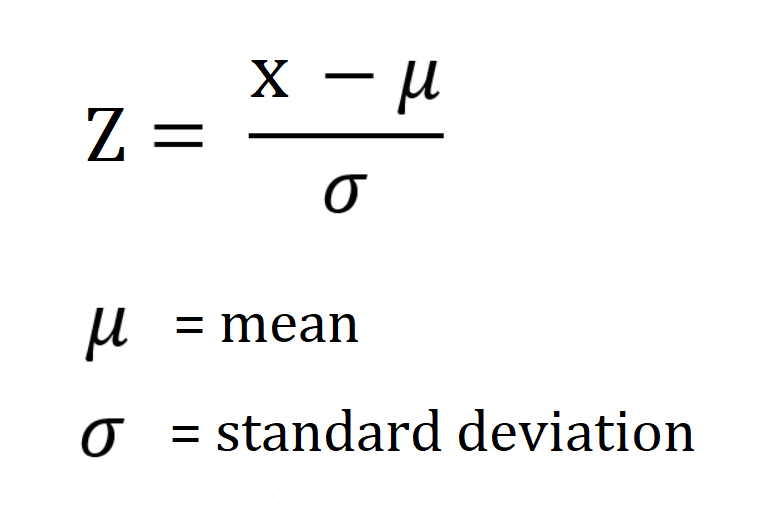

In [26]:
df['z-score']= (df.Height- df.Height.mean())/ df.Height.std()

df.sample()

,Gender,Height,z-score
1832,Male,68.019078,0.429241


In [28]:
df[df['z-score']>3]

,Gender,Height,z-score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [29]:
df[df['z-score'] < -3]


,Gender,Height,z-score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [31]:
df[(df['z-score']<-3) | (df['z-score']>3)]

,Gender,Height,z-score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


# **Exercise**

In [47]:
import pandas as pd



df= pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [48]:
min_threshold, max_threshold= df.price_per_sqft.quantile((0.001, 0.999))
min_threshold, max_threshold


(1366.184, 50959.36200000098)

In [49]:
df2= df[(df.price_per_sqft>min_threshold) & (df.price_per_sqft<max_threshold)]
df2.shape

(13172, 7)

In [51]:
df.shape[0]-df2.shape[0]

28

In [54]:
df2_std= df2.price_per_sqft.std()
df2_mean= df2.price_per_sqft.mean()

df2_std, df2_mean

(4141.020700174613, 6663.6537351958705)

In [55]:
df2.price_per_sqft.describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [56]:
upper_limit= df2_mean+ 4*df2_std
upper_limit


23227.73653589432

In [57]:
lower_limit= df2_mean- 4*df2_std
lower_limit


-9900.429065502582

In [58]:
df3= df2[(df2.price_per_sqft>lower_limit) & (df2.price_per_sqft<upper_limit)]
df3.shape

(13047, 7)

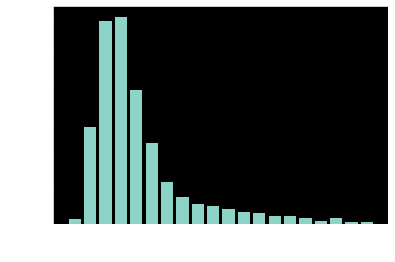

In [59]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()


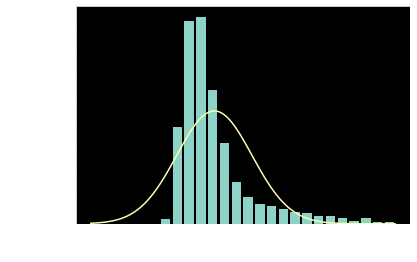

In [60]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [61]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/ df2.price_per_sqft.std()
df2.sample(10)

C:\Users\deepa\AppData\Local\Temp\ipykernel_20300\3430343505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/ df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
6038,Gottigere,3 BHK,1425.0,2.0,47.0,3,3298,-0.812759
8373,KR Puram,4 Bedroom,1200.0,4.0,100.0,4,8333,0.403124
9449,Vishveshwarya Layout,4 Bedroom,2000.0,3.0,90.0,4,4500,-0.522493
1581,Electronic City,2 BHK,975.0,2.0,37.5,2,3846,-0.680425
448,other,4 Bedroom,1200.0,4.0,200.0,4,16666,2.415430
3836,Hebbal,3 BHK,2080.0,3.0,175.0,3,8413,0.422443
12021,Bellandur,3 BHK,1690.0,2.0,116.0,3,6863,0.048139
2535,other,3 BHK,1150.0,2.0,75.0,3,6521,-0.034449
9266,Thanisandra,2 BHK,1183.0,2.0,77.3,2,6534,-0.031310
11901,Yelahanka,3 BHK,1325.0,2.0,58.0,3,4377,-0.552196


In [64]:
df4 = df2[(df2.zscore > -4) & (df2.zscore < 4)]
df4.shape


(13047, 8)

In [66]:
df4.shape[0]==df3.shape[0]

True